# <center> Regressão Linear Múltipla em Python </center>

## Basic ToolBox - Regressão Linear Mútipla I

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
from scipy.special import inv_boxcox
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import summary_table

## ``Regressão Linear Mútipla``
<br>

A ``Regressão Linear Múltipla`` é um **modelo de análise** que usamos quando modelamos a **relação linear** entre uma **variável de desfecho contínua** e **múltiplas variáveis preditoras** que podem ser **contínuas** ou **categóricas**. A principal diferença entre a **Regressão Linear Múltipla** e a **Simples**, é que, na simples só usamos **uma variável preditora**.

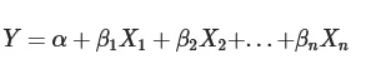

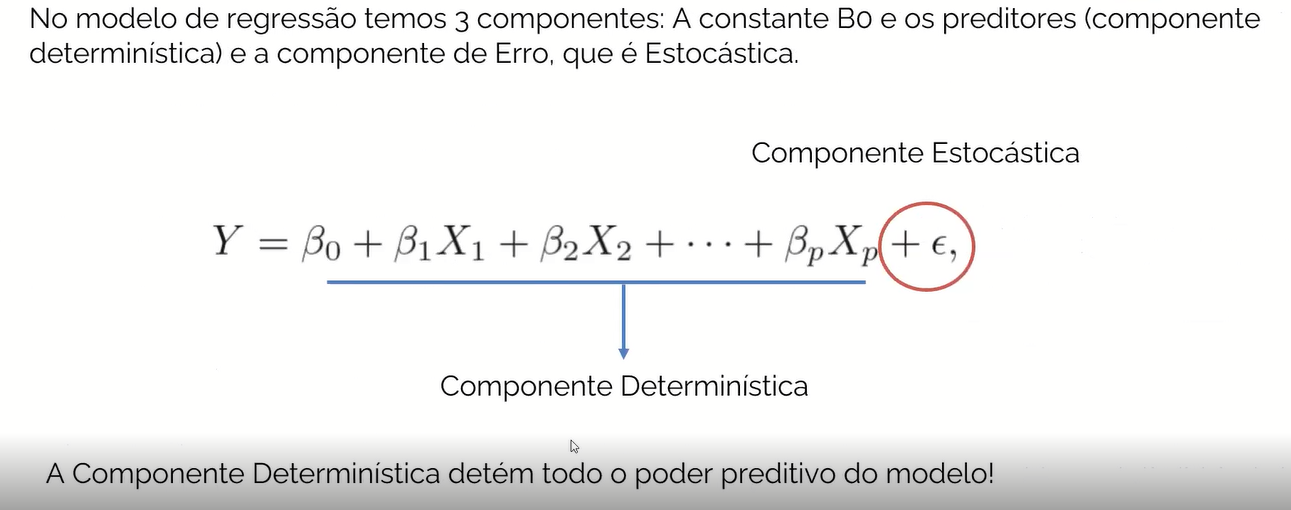

``e`` : é a **soma** de todos os **residuos** (erros)

### Podemos usar a Regressão Linear Múltipla quando o objetivo da pesquisa envolve:
<br>

* Projetar o valor de uma **variável de desfecho** (também chamada de **variável dependente**, **VD**) através de um conjunto de outras **variáveis preditoras** (também chamadas de **variáveis independentes**, **VIs**);
<br>

* Investigar que **variáveis se relacionam** com uma **variável de desfecho**;
<br>

* Investigar qual **conjunto de variáveis** traz uma **melhor explicação** para a **variável de resultado**;
<br>

* Entender a **relação entre uma variável de resultado** e uma **preditora**, controlando pelo **efeito de outras variáveis preditoras**.

### Para executar a Regressão Linear Múltipla, deve se conferir se os dados **seguem estes pressupostos**:
<br>

* ``Linearidade``: a relação entre as variáveis deve ser linear.
<br>

* ``Homoscedasticidade`` (ou ``Homogeneidade de Variância``): os **termos de erro** deve ter **variância constante**, independente dos valores das **variáveis preditoras**. Quebramos esse pressuposto quando as **variáveis preditoras** tem mais ou menos erro dependendo de seus valores.
<br>

* ``Independência de erros``: Os erros nas **variáveis preditoras** não devem estar **correlacionados**.
<br>

* ``Não multicolinearidade``: as **variáveis preditoras** não podem ser próximas de uma **correlação perfeita**.
<br>

* ``Baixa exogeneidade``: os valores das **variáveis preditoras** não devem estar contaminados com **erros de medida**. **Erros de medida** podem levar **estimativas inconsistentes** e **superestimação dos coeficientes** de regressão.

### Propriedades do Modelo Regressão Linear
<br>

* O modelo de regressão é linear nos parâmetros
<br>

* O numero de observações, **n**, deve ser superior ao numerio de parâmetros estimados pelo modelo
<br>

* Os erros são variaveis aleatorias com valor esperado nulo e variancia constante
<br>

* Os termos de terros são normalmente distribuidos
<br>

* Os erros são não correlacionados, isto é, são independentes sob a condição de normalidade

Para correlacionar os dados de multiplas **variaveis independente**, versus, a **variavel dependete**,  na ``regressão linear multipla``, utiliza se o **grafico de areas empilhadas** para a visualização. 

In [ ]:
# Carregando dataSet em Pandas DataFrame
df_reservatorio = pd.read_csv('clorofila.csv')
display(df_reservatorio.head())

,Condutividade,DO,pH,ORP,Profundidade,Temperatura,Turbidez,Clorofila
0,121.73,8.32,7.47,198.04,0.37,20.55,6.98,59.97
1,121.29,5.67,6.90,231.30,0.40,19.98,4.65,30.59
2,120.77,5.33,6.79,229.20,0.42,19.61,3.94,17.06
3,119.50,7.61,7.10,228.61,0.41,19.47,5.20,38.00
4,121.17,7.96,7.12,208.77,0.39,19.73,4.76,24.39


## ``Segregando as Variaveis``

In [ ]:
# Gerando as Variaveis Independentes ( Preditoras )
x = df_reservatorio.drop(columns=['Clorofila'])

In [ ]:
# Gerando Variavel Dependente ( Desfecho )
y = df_reservatorio['Clorofila']

## ``Construindo Modelo``

In [ ]:
# Gerando a Constante (B-zero)
x = sm.add_constant(x)

In [ ]:
# Descobrindo os Betas atraves do processo de otimização OLS
model_linear_multiple = sm.OLS(y, x)
# Aplicando OLS (Ordinary Least Squares - Mínimos Quadrados Ordinários)

# Gerando a reta da equação
model_linear_multiple = model_linear_multiple.fit()
# Após gerar os betas, estimar a reta

In [ ]:
display(model_linear_multiple.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Clorofila   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     75.55
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           1.75e-74
Time:                        09:34:00   Log-Likelihood:                -1914.5
No. Observations:                 512   AIC:                             3845.
Df Residuals:                     504   BIC:                             3879.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -46.1466      7.801     -5.916      0.000     -61.473     -30.820
Condutividade     0.4427      0.046      9.600      0.000       0.352       0.533
DO                2.3072      0.571      4.039      0.000       1.185       3.430
pH                5.6649      1.320      4.291      0.000       3.071       8.258
ORP               0.0103      0.006      1.786      0.075      -0.001       0.022
Profundidade    -33.4486      6.411     -5.217      0.000     -46.045     -20.852
Temperatura      -1.7361      0.230     -7.537      0.000      -2.189      -1.284
Turbidez          0.0204      0.009      2.229      0.026       0.002       0.038
==============================================================================
Omnibus:                       11.623   Durbin-Watson:                   0.393
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               18.391
Skew:                           0.147   Prob(JB):                     0.000102
Kurtosis:                       3.881   Cond. No.                     4.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## statsmodels.stats.outliers_influence.``summary_table()``

* Cria uma tabela de resumo com todas as medidas de influência e outliers por meio de **Testes de atipicidades** para instâncias **RegressionResults**.


``st`` : **instância SimpleTable**
* tabela com resultados que podem ser impressos
<br>
</br>

``data``: **ndarray**
* medidas calculadas e estatísticas para a tabela
<br>
</br>

``ss2`` : **lista de strings**
* column_names para tabela (Nota: as linhas da tabela são observações)
<br>
</br>

``alpha``: **float**
* nível de significância para intervalo de confiança

In [ ]:
st, data, ss2 = summary_table(model_linear_multiple, alpha = 0.05)

In [ ]:
display(st)

Obs,Dep Var,Predicted,Std Error,Mean ci,Mean ci,Predict ci,Predict ci,Residual,Std Error,Student,Cook's
,Population,Value,Mean Predict,95% low,95% upp,95% low,95% upp,,Residual,Residual,D
1.0,59.97,23.391439665551584,1.1349664322676847,21.161591541624016,25.62128778947915,3.1109744263536108,43.67190490474955,36.57856033444841,10.196964212525476,3.587201011210475,0.019927172650244095
2.0,30.59,14.135904161511776,1.0357962875149354,12.100893836253473,16.17091448677008,-6.12406411799058,34.395872441014134,16.45409583848822,10.207514585082405,1.6119590818449354,0.0033444655111179574
3.0,17.06,12.43534813911986,1.1115149312568091,10.251574757180832,14.619121521058888,-7.840102875498758,32.71079915373848,4.624651860880139,10.199547171884296,0.4534173706876211,0.0003051934030045258
4.0,38.0,19.48669581007359,1.236237088838311,17.05788304971027,21.915508570436913,-0.8166088245773224,39.790000444724505,18.51330418992641,10.18518265982895,1.8176703166006178,0.006084237197027935
5.0,24.39,21.150468287914276,1.2336667522329055,18.72670542162225,23.574231154206302,0.847767135246194,41.45316944058236,3.239531712085725,10.185494308001692,0.31805346055132144,0.00018549908154776818
6.0,21.21,21.969869859824733,1.199834744749426,19.612576129774038,24.32716358987543,1.6749965812780054,42.26474313837146,-0.7598698598247324,10.189535050196934,-0.0745735557198016,9.63859757269966e-06
7.0,32.3,24.153499417429373,1.1713590967309613,21.852151280575413,26.454847554283333,3.8650482466392546,44.44195058821949,8.146500582570624,10.192847777751092,0.799236951262313,0.0010545086690606949
8.0,27.23,26.709004829762385,1.210676071006824,24.330411341120907,29.087598318403863,6.411646512810368,47.006363146714406,0.5209951702376152,10.188252617843318,0.05113685239068024,4.61566739373661e-06
9.0,16.71,23.140288457528893,1.1577169137509327,20.86574287206274,25.414834042995047,2.854860059713449,43.425716855344334,-6.430288457528892,10.194406284895397,-0.6307663514506351,0.0006413984837673473


## <center> Teste de Nomalidade </center>


Em probabilidade e estatística, a **distribuição normal** é uma das **distribuições de probabilidade** mais utilizadas para **modelar fenômenos naturais**. Isso se deve ao fato de que um grande número de fenômenos naturais apresenta sua **distribuição de probabilidade** muito **proxima a normal**. A **distribuição normal** também é chamada **distribuição gaussiana**, **distribuição de Gauss** ou **distribuição de Laplace–Gauss**.

**Distribuição Normal** ou **Distribuição Gaussiana**: É o modelo **probabilístico** utilizado para **descrever** de forma geral a **freqüência** com que **valores** ocorrem em um **histograma**.

**Distribuição normal** de dados, é a principal **distribuição de probabilidade** que existe em estatística, e, uma **distribuição de probabilidade** descreve o comportamento aleatório de um **fenômeno dependente do acaso**. Uma **distribuição de probabilidade** é um **modelo matemático** que relaciona um certo **valor da variável em estudo** com a sua **probabilidade de ocorrência**. 

#### Há dois tipos de distribuição de probabilidade:


``1``. **Distribuições Contínuas**: Quando a variável que está sendo medida é expressa em uma escala contínua, como no caso de uma característica dimensional.

``2``. **Distribuições Discretas**: Quando a variável que está sendo medida só pode assumir certos valores, como por exemplo os valores inteiros: 0, 1, 2, etc.

Sempre que se visualiza, em um **gráfico de histograma**, a distribuição dos dados, se desenhando com a **reta** e a **distribuição do histograma**, tomam a forma de um **sino**, significa que a maior parte dos dados, são os **valores concentrados em torno da média**, que é dado pelo **ponto mais alto da curva** na **forma de sino**, o cume da curva, e esta **média divide o conjunto de dados na metade**, em **lados simétricos**, sendo **50% para cada lado**, direito e esquerdo.

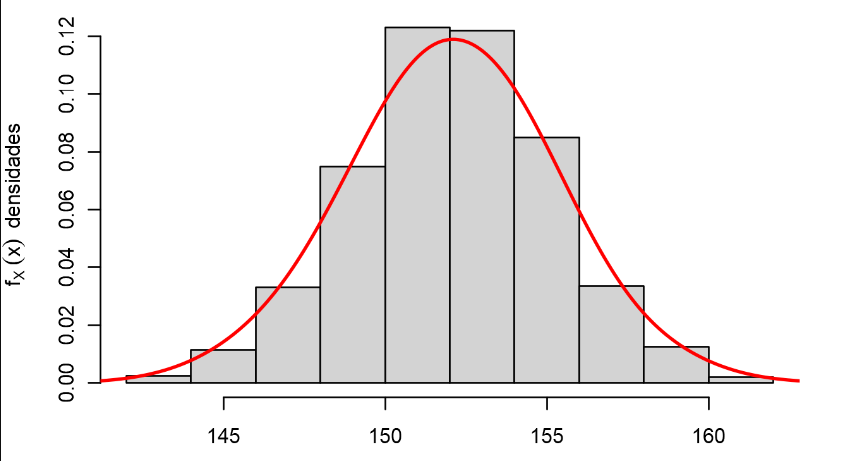

Em resumo, a **media divide** a distribuição dos dados da seguinte maneira, **50%** dos **valores menores** para um lado,  e **50%** para os **valores maiores** para o outro lado, sendo a grande parte dos dados com sua distribuição em torno da media e poucos dados muito menores e poucos dados de maiores valores.

A suposição de ``normalidade`` é aquela, segunda a qual, assumimos que um conjunto de dados segue uma ``distribuição normal``, por não termos evidências suficientes para descartar esta. 

Em estatística, os ``testes de normalidade`` são usados para determinar se um conjunto de dados, de uma dada variável aleatória, é bem modelada por uma ``distribuição normal`` ou **não**, ou para **calcular a probabilidade** da variável aleatória subjacente estar normalmente distribuída.

Os ``testes de normalidade`` estatísticos como **Kolmogorov-Smirnov (K-S)** , **Shapiro-Wilk** e **Anderson-Darling** comparam os **valores de média** e **desvio padrão** da amostra testada, com a de uma ``distribuição normal``. A **hipótese nula** é que, a amostra é normal, então se o teste é significativo ``p<0.05`` a amostra é **não normal**.

### Teste de Normalidade ``QQPlot``

Em estatística, um ``gráfico QQ``, é um **gráfico de probabilidades**, que é um método para **comparar duas distribuições de probabilidade**, traçando seus **quantis uns contra** os outros

``QQ Plot`` é uma **técnica gráfica** que **relaciona os quantis** de uma **amostra** com os **quantis teóricos da distribuição** escolhida, que neste contexto, é a distribuição normal. O ``QQ plot``, plota os **quantis teóricos** de uma distribuição específica **versus** os **quantis observados** para a distribuição dos dados.

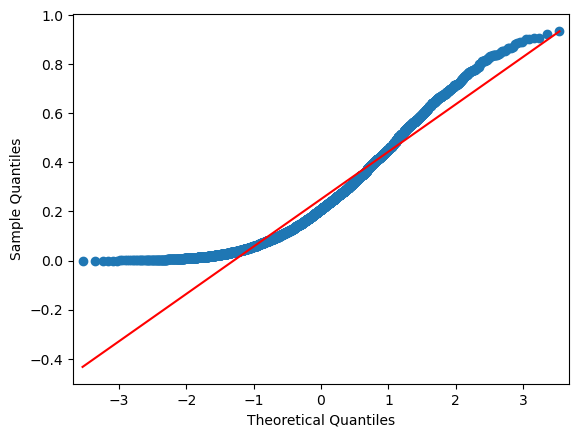

In [ ]:
# Gerando dados para exemplificação de uma distribuição não normal
non_normal_data = np.random.beta(1, 3, 5000)

# Plotando grafico "q-q plot"
sm.qqplot(non_normal_data, line='s')
plt.show()

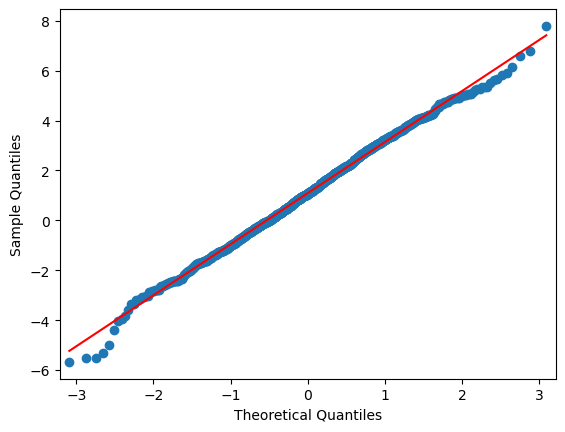

In [ ]:
# Gerando dados para exemplificação de uma distribuição normal de média 1 e desvio 2
normal_data= np.random.normal(loc=1, scale=2, size=1000)

# Plotando grafico "q-q plot"
sm.qqplot(normal_data, line='s')
plt.show()

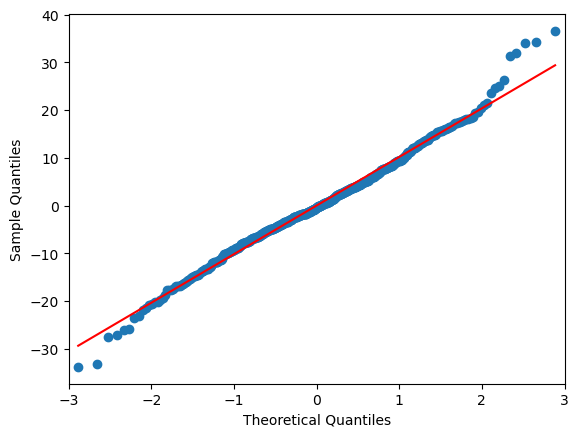

In [ ]:
# Plotando grafico "q-q plot" para visualizar um comparativo entre distribuição normal e os dados
sm.qqplot(data[:,-4], line='s')
# Inserindo  todos os dados das ultimas 4 colunas, gerados pela summary_table

plt.show()

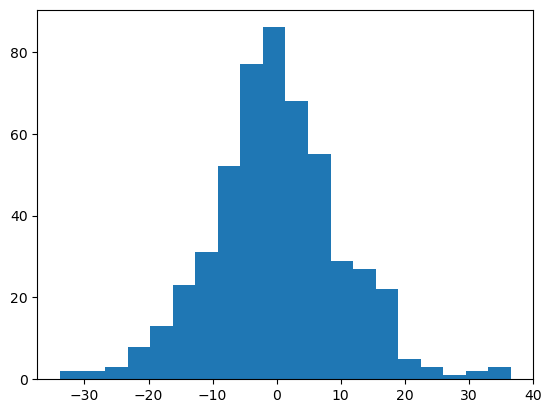

In [ ]:
# Plotando um grafico de histograma para visualizar a distribuição
plt.hist(data[:,-4], 20);
# Inserindo  todos os dados das ultimas 4 colunas, gerados pela summary_table

plt.show()

### ``Testes de Kolgomorov-Smirnov``

Em estatística, o ``teste Kolmogorov–Smirnov`` é um **teste não paramétrico** de bondade do ajuste sobre a **igualdade de distribuições de probabilidade contínuas e unidimensionais** que pode ser usado para **comparar uma amostra** com uma **distribuição de probabilidade de referência** ou **duas amostras** uma com a outra.



## ``Teste de Shapiro Wilk``

Realize o **teste de Shapiro-Wilk** para normalidade. O **teste de Shapiro-Wilk** testa a **hipótese nula** de que os dados foram extraídos de uma distribuição normal. Retorna a **estatística do teste** e o ``valor p`` para o **teste de hipótese**.

O ``Teste de Shapiro-Wilk`` tem como objetivo avaliar se uma distribuição é semelhante a uma distribuição normal. A distribuição normal também pode ser chamada de gaussiana e sua forma assemelha-se a de um sino. Os ``testes de Kolgomorov-Smirnov`` e ``Shapiro-Wilk`` são utilizados para determinar se uma amostra segue uma distribuição normal.

A **hipótese nula** do ``teste de Shapiro-Wilk`` é que a população **possui distribuição normal**. Portanto, um valor de ``p < 0.05`` indica que você **rejeitou a hipótese nula**, ou seja, seus dados **não possuem distribuição normal**.

Para amostras de **dimensões superior ou igual a 30**, aconselha-se o ``teste de Kolmogorov-Smirnov``, com a **correção de ``Lilliefors``**, mas para amostras de **dimensões mais reduzida**, é mais indicado o ``teste de Shapiro-Wilk``.

In [ ]:
# Gerando uma função python para "teste de Shapiro-Wilk"
def shapiro_test(data, alpha=0.05):
    stat, p = stats.shapiro(data)
    print('p-valor: p=%.3f' % (p))
    # interpret
    alpha = alpha
    if p > alpha:
        print('A amostra parece ser normalmente distribuiída Gaussian. Não rejeitamos H0')
    else:
        print('A amostra NÃO parece ser normalmente distribuiída Gaussian. Rejeitamos H0')
    return stat, p

Gerando a função na distribuição normal gerada anteriormente

In [ ]:
# Aplicando a função python "shapiro_test"
stat_normal, p_normal = shapiro_test(normal_data)
# Extraindo o coeficiente do teste e o coeficeinte do P-Valor

p-valor: p=0.134
A amostra parece ser normalmente distribuiída Gaussian. Não rejeitamos H0


In [ ]:
# Gerando dados para exemplificação de uma distribuição não normal
non_normal_data = np.random.beta(1, 3, 5000)

# Aplicando a função python "shapiro_test" em uma distribuição "Não Normal"
stat_non_normal, p_non_normal = shapiro_test(non_normal_data)

p-valor: p=0.000
A amostra NÃO parece ser normalmente distribuiída Gaussian. Rejeitamos H0


# <center> Transformações </center>

Os testes de normalidade estatísticos como **Kolmogorov-Smirnov (K-S)** , **Shapiro-Wilk* e **Anderson-Darling**, entre outros, comparam os valores de **média** e **desvio padrão** da **amostra testada** com o de uma **distribuição normal**. A **hipótese nula** é que a amostra é normal, então, se o teste é significativo, o ``p-valor <0.05`` a **amostra é não normal**.

## ``Box Cox``

Em estatística, uma ``transformação de potência - Box Cox`` é uma **família de funções** que são aplicadas para **criar a transformação monotônica de dados** usando **funções de potência**. A ``transformação de potência`` é definida como uma **função de variação contínua**, em relação ao **parâmetro de potência** ``λ (lambda)``, ou seja, ``x^λ``.

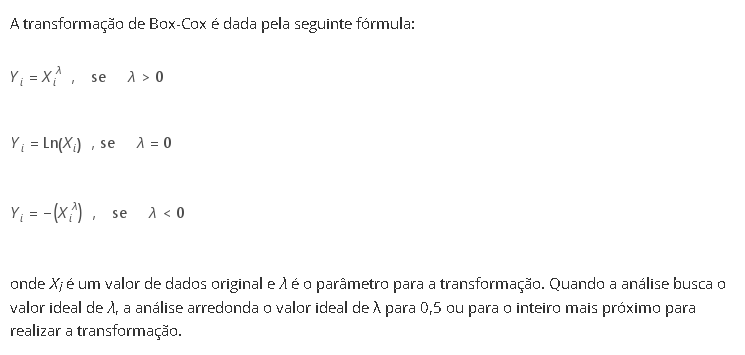

Esta é uma **técnica de transformação de dados** útil usada para **estabilizar a variância**, tornar os dados mais **semelhantes à distribuição normal**, melhorar a **validade das medidas de associação** (como a correlação de Pearson entre as variáveis) e para outros procedimentos de estabilização de dados. É bastante conhecida no meio econométrico e usada para **enfrentar problemas de heterocedasticidade**.

Na prática, poderíamos aplicar diferentes lambdas de forma contínua, e ir testando qual lambda fornece para uma transformação cuja **distribuição se aproxima mais da normal**. Contudo, isso não é necessário, pois o ``Scipy`` já realiza essa busca internamente e nos retorna os **dados transformados** e o **valor de lambda** correspondente.

In [ ]:
# Gerando uma distribuição de dados para exemplificação
data = np.random.beta(1, 3, 5000)

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_5488\1075071822.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)


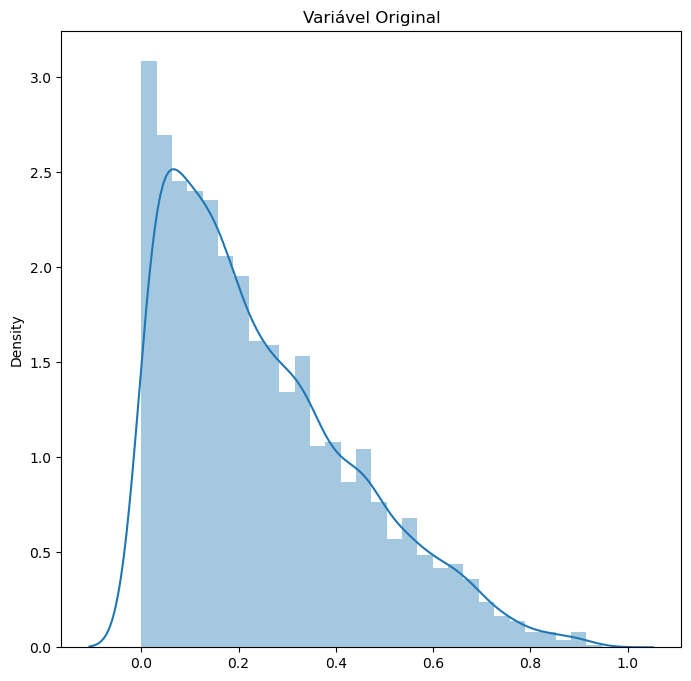

In [ ]:
# Visualizar a distribuição dos dados
plt.figure(figsize = (8, 8))
sns.distplot(data)
plt.title('Variável Original')
plt.show()

In [ ]:
# Aplicando a transformação "box-cox" nos dados
transformed_data, lambda_found = stats.boxcox(data)
# A função nos retorna os dados e o número lambda

In [ ]:
print(f'Melhor Lambda Encontrado: {lambda_found}')

Melhor Lambda Encontrado: 0.4027777122196329


C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_5488\2319287166.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data)


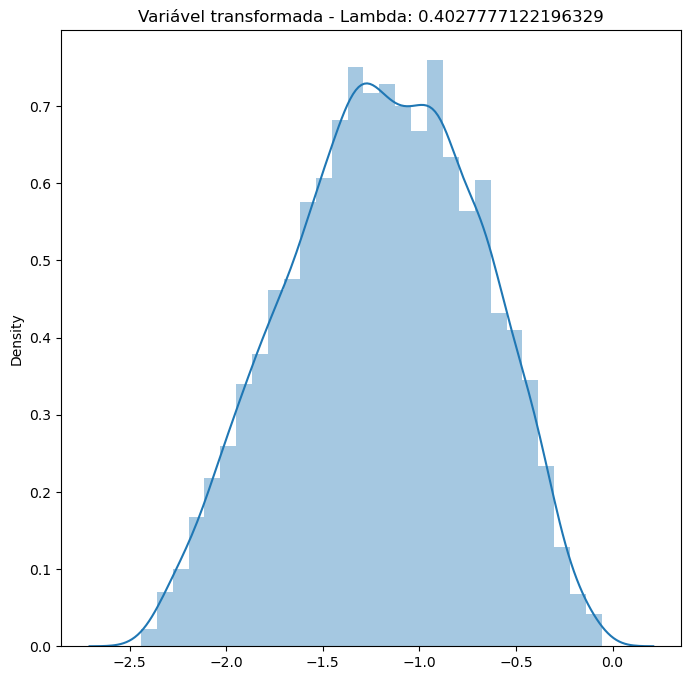

In [ ]:
# Plotando um histograma para visualizar os dados transformados box-cox
plt.figure(figsize = (8, 8))
sns.distplot(transformed_data)
plt.title(f'Variável transformada - Lambda: {lambda_found}')
plt.show()

É importante destacar que, após realizar alguma previsão para essa variável, é preciso aplicar a **transformação inversa**

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_5488\2078622392.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(inverse_data)


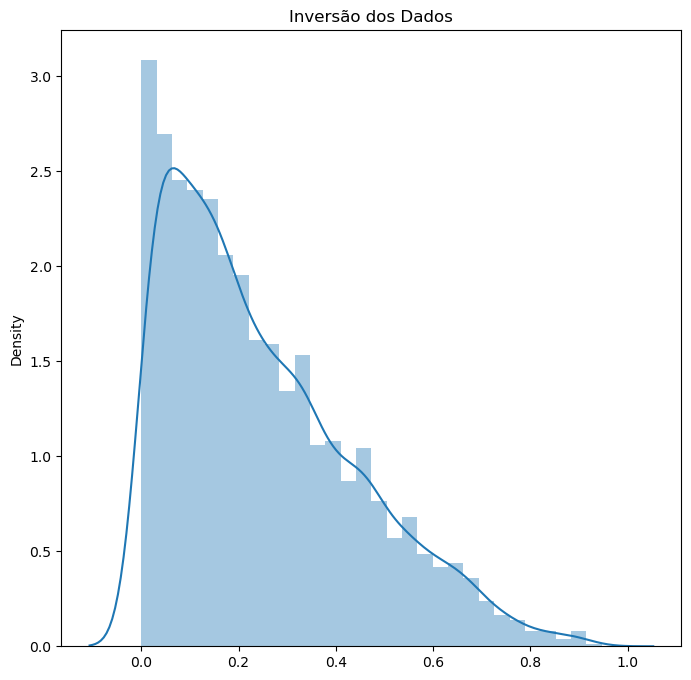

In [ ]:
plt.figure(figsize=(8,8))
inverse_data = inv_boxcox(transformed_data, lambda_found)
sns.distplot(inverse_data)
plt.title('Inversão dos Dados')
plt.show()

Na transformação inversa, será que os dados são recuperados perfeitamente??

In [ ]:
# Observando se houve alguma diferença na transformção em comparação com o original
np.mean(((inverse_data - data)/data))
# A diferença insignificante dos dados que sofreram transformação em comparação ao original

5.5080570206671644e-18

## ``Yeo-Johnson``

A ``transformação Yeo-Johnson`` é uma técnica de transformação semelhante à transformação de Box-Cox. No entanto, a transformação Yeo-Johnson é mais flexível porque pode ser usada para variáveis que podem assumir valores negativos. 

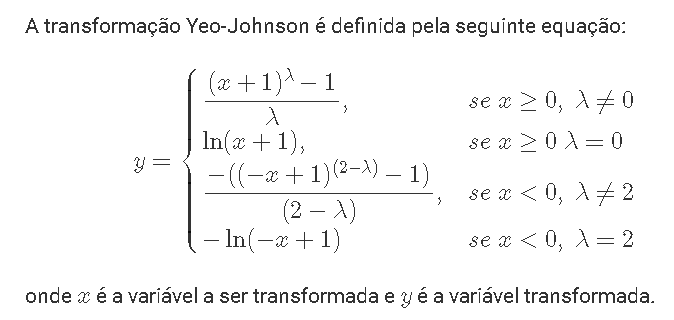

Em estatística e econometria , a **transformada de Yeo-Johnson** é uma transformação **não linear** que permite **reduzir a assimetria** e se aproximar de uma distribuição normal.

In [ ]:
# Gerando dados para exemplificação
data1 = np.random.beta(1, 2, 5000)

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_5488\3895615990.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1)


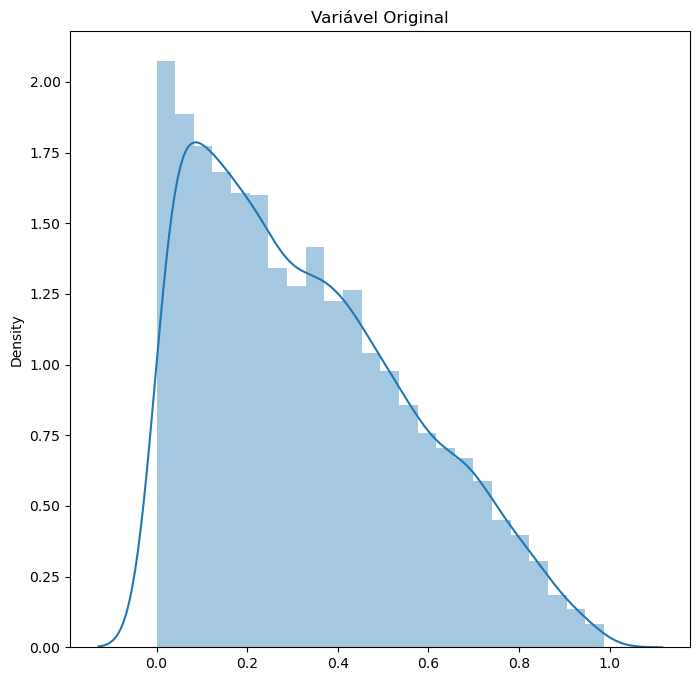

In [ ]:
# Plotando um Grafico para visualizar a distribuição
plt.figure(figsize = (8, 8))
sns.distplot(data1)
plt.title('Variável Original')
plt.show()
# Distribuição "Não Normal"

In [ ]:
# Aplicando a "transformação de Yeo-Johnson"
transformed_data_yeo, lambda_found_yeo = stats.yeojohnson(data1)

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_5488\4048262950.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data_yeo)


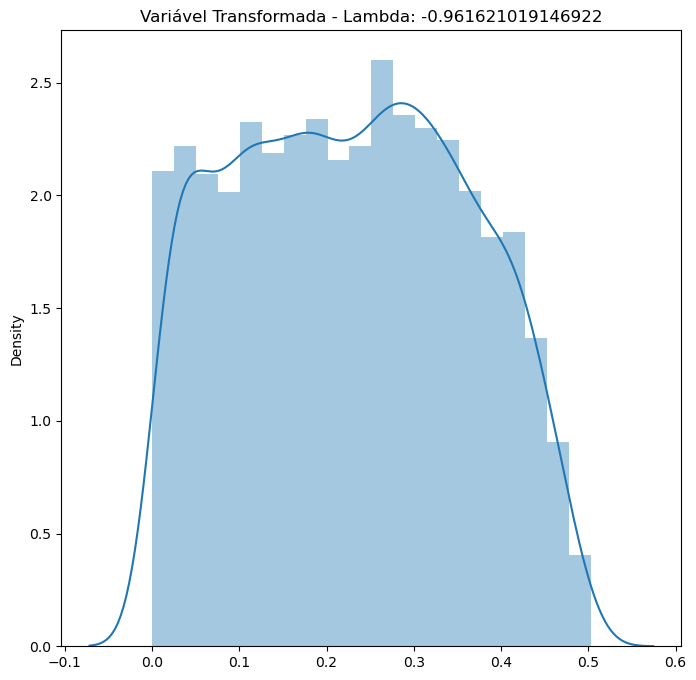

In [ ]:
# Plotando um grafico para visualizar a distribuição após a transformação
plt.figure(figsize = (8, 8))
sns.distplot(transformed_data_yeo)
plt.title(f'Variável Transformada - Lambda: {lambda_found_yeo}')
plt.show()
# "Distribuição Normal"